# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

# Read in data

In [3]:
rawData = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
N, pp1 = rawData.shape

X = np.array(rawData.iloc[:,:-2])
y = np.array(rawData.iloc[:,-2])
print(X.shape, y.shape)

(122, 9) (122,)


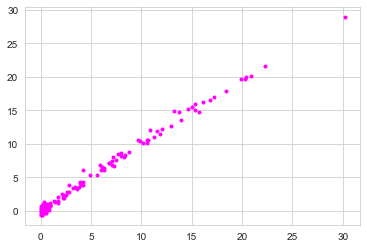

In [4]:
w = (np.linalg.inv(X.T @ X)) @ X.T @ y
yh_lin = X @ w
plt.plot(y, yh_lin, '.', color='magenta')

# RBF model and plot

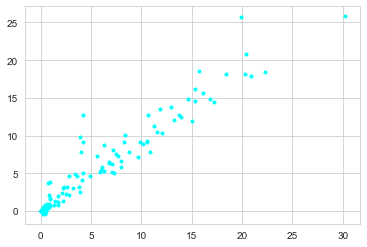

In [5]:
# J = 20basis functions obtained by k-means clustering
# sigma set to standard deviation of entire data

from sklearn.cluster import KMeans
J = 20
kmeans = KMeans(n_clusters=J, random_state=0).fit(X)
sig = np.std(X)

# Construct design matrix
U = np.zeros((N,J))
for i in range(N):
    for j in range(J):
        U[i][j] = np.exp(-np.linalg.norm(X[i] - kmeans.cluster_centers_[j])/sig)
        
# Solve RBF model, predict and plot
w = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) @ y
yh_rbf = np.dot(U,w)
plt.plot(y, yh_rbf, '.', color='cyan')

In [6]:
print(np.linalg.norm(y-yh_lin), np.linalg.norm(y-yh_rbf))

5.697890874095499 19.14182866445834


# Solving by SGD

In [7]:
def predict(x, w):
    pred = np.dot(x,w)
    return pred

def error(y_true, yh):
    return yh - y_true

def update(w, x, lr, error):
    w -= lr * error * x
    return w

def fullError(X,y,w):
    yh = X @ w
    return np.linalg.norm(y-yh)

In [8]:
# np.random.seed(102)
def SGD(X, y, lr = 0.1):
    p = X.shape[1]
    errors = list()
    w = np.random.randn(p)
    
    for i in range(100):
        for x, y_true in zip(X,y):
            yh = predict(x, w)
            err = error(y_true, yh)
            w = update(w, x, lr, err)
        
            errors.append(fullError(X,y,w))
        if i % 20 == 0:
            lr /= 2
    return w, errors
        
w_,s= SGD(U, y)        

Text(0.5, 1.0, 'Final solution of RBF regression using SGD')

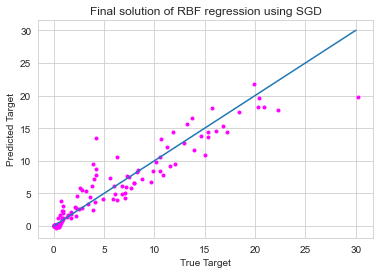

In [9]:
# U @ w_
plt.plot(y, U @ w_, '.', color='magenta')
plt.plot([0,30], [0,30])
# plt.ylim((0,30))
plt.xlabel('True Target')
plt.ylabel('Predicted Target')
plt.title('Final solution of RBF regression using SGD')
# plt.savefig('true_vs_pred.pdf')

Text(0.5, 1.0, 'Error plot of SGD for RBF model')

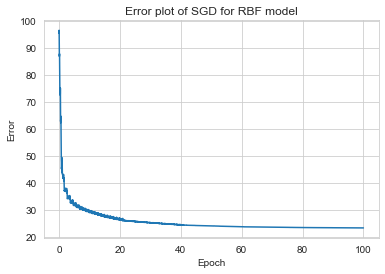

In [10]:
ints = np.linspace(0,100,len(s))
plt.plot(ints,s)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error plot of SGD for RBF model')
# plt.savefig('error_plot.pdf')